In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /Users/sunao-mac/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


## Changes in model signal

In [4]:
dirname = './single_source_ClY1'
x,y,y_dict,cov, pnames, F = hsc3x2pt.getFisherMat(dirname, power_b1)

In [5]:
v = np.diag(cov.get_full_covariance())**0.5

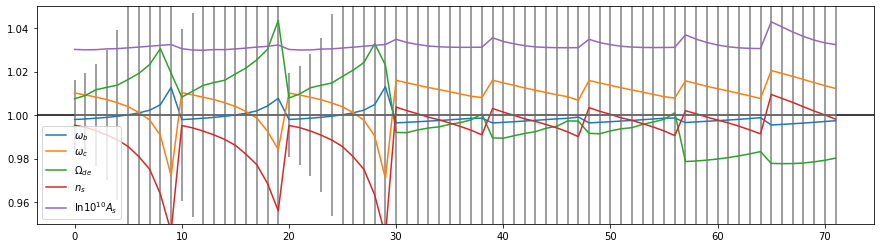

In [6]:
plt.figure(figsize=(15,4))
#plt.yscale('log')
#plt.plot(y.get_signal(), color='k')
v_fid = y.get_signal()
plt.ylim(0.95, 1.05)
plt.plot(y_dict['omega_b'].get_signal()/v_fid, label=r'$\omega_b$')
plt.plot(y_dict['omega_c'].get_signal()/v_fid, label=r'$\omega_c$')
plt.plot(y_dict['Omega_de'].get_signal()/v_fid, label=r'$\Omega_{de}$')
plt.plot(y_dict['n_s'].get_signal()/v_fid, label=r'$n_s$')
plt.plot(y_dict['ln10p10As'].get_signal()/v_fid,label=r'$\ln 10^{10}A_s$')
plt.errorbar(np.arange(len(v)), np.ones(len(v)), v/v_fid, color='gray')
plt.axhline(1.0, color='k')
plt.legend()
plt.show()

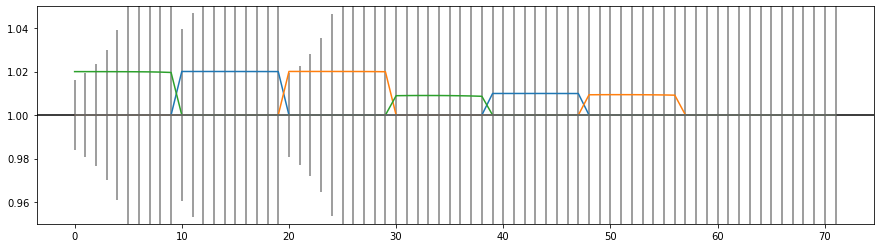

In [7]:
plt.figure(figsize=(15,4))
#plt.yscale('log')
#plt.plot(y.get_signal(), color='k')
plt.ylim(0.95, 1.05)
plt.plot(y_dict['b1lowz'].get_signal()/y.get_signal())
plt.plot(y_dict['b1cmass1'].get_signal()/y.get_signal())
plt.plot(y_dict['b1cmass2'].get_signal()/y.get_signal())
plt.errorbar(np.arange(len(v)), np.ones(len(v)), v/v_fid, color='gray')
plt.axhline(1.0, color='k')
plt.show()

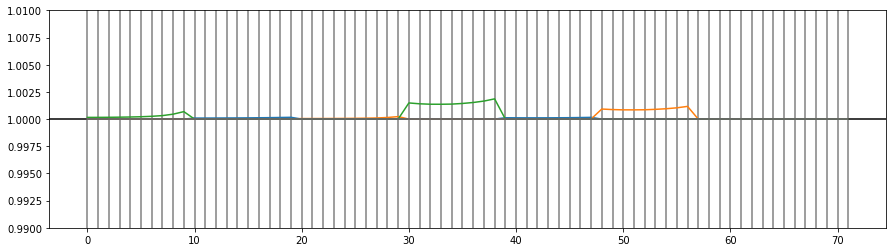

In [8]:
plt.figure(figsize=(15,4))
#plt.yscale('log')
#plt.plot(y.get_signal(), color='k')
plt.ylim(0.99, 1.01)
plt.plot(y_dict['alphamaglowz'].get_signal()/y.get_signal())
plt.plot(y_dict['alphamagcmass1'].get_signal()/y.get_signal())
plt.plot(y_dict['alphamagcmass2'].get_signal()/y.get_signal())
plt.errorbar(np.arange(len(v)), np.ones(len(v)), v/v_fid, color='gray')
plt.axhline(1.0, color='k')
plt.show()

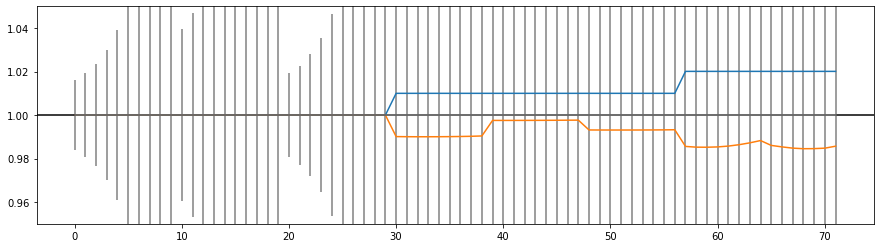

In [9]:
plt.figure(figsize=(15,4))
#plt.yscale('log')
#plt.plot(y.get_signal(), color='k')
plt.ylim(0.95, 1.05)
plt.plot(y_dict['dm'].get_signal()/y.get_signal())
plt.plot(y_dict['dzph'].get_signal()/y.get_signal())
plt.errorbar(np.arange(len(v)), np.ones(len(v)), v/v_fid, color='gray')
plt.axhline(1.0, color='k')
plt.show()